In [2]:
import arviz as az
import pandas as pd
import xarray as xr
import numpy as np
import pickle

from https://python.arviz.org/en/stable/getting_started/CreatingInferenceData.html

https://oriolabrilpla.cat/en/blog/posts/2020/plot-trace.html

# 広い事前分布で長い時間を書けた結果(作品固有項なし)

各パラメーターの事前分布が一様分布~uniform(1e-6,1000);の場合はRhatが１に近づかなかった。ので指数分布、student t分布を用いた。


事前分布情報
```
maincharpower[t,l]~normal(mu_m,sigma_m);
bosspower[t,l]~normal(mu_b,sigma_b);
subpower[t,l]~normal(mu_s,sigma_s);


  mu_i~exponential(50);
  mu_m~exponential(100);
  mu_b~exponential(100);
  mu_s~exponential(100);;

  sigma_i~student_t(4,0,100);
  sigma_m~student_t(4,0,100);
  sigma_b~student_t(4,0,100);
  sigma_s~student_t(4,0,100);
 ```

### 計算に２日くらいかかった。

In [23]:
with open('fit_hyper.pkl', 'rb') as f:
    fit= pickle.load(f)
    
summary_hyper = az.summary(fit)
print(summary_hyper)


/home/xiangze/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.1.36ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/home/xiangze/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.3.11py3 is an invalid version and will not be supported in a future release
  warnings.warn(
/home/xiangze/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.23ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(


                      mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
maincharpower[0, 0]  7.965  2.702   3.033   13.405      0.068    0.048   
maincharpower[0, 1]  6.989  5.348   0.000   16.853      0.267    0.189   
maincharpower[0, 2]  7.067  5.257   0.001   16.262      0.106    0.075   
maincharpower[0, 3]  6.487  5.481   0.000   16.427      0.379    0.268   
maincharpower[0, 4]  6.276  5.310   0.001   15.829      0.415    0.294   
...                    ...    ...     ...      ...        ...      ...   
mu_s                 0.002  0.001   0.000    0.005      0.000    0.000   
sigma_i              8.531  0.548   7.611    9.653      0.078    0.057   
sigma_m              8.710  1.385   6.152   11.238      0.072    0.051   
sigma_b              0.001  0.000   0.000    0.001      0.000    0.000   
sigma_s              0.001  0.000   0.000    0.001      0.000    0.000   

                     ess_bulk  ess_tail  r_hat  
maincharpower[0, 0]    1477.0    5059.0   1.01  
maincharpower

## Rhatがうまく行った。

/home/xiangze/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.1.36ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/home/xiangze/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.3.11py3 is an invalid version and will not be supported in a future release
  warnings.warn(
/home/xiangze/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.23ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(


array([<AxesSubplot:title={'center':'94.0% HDI'}>], dtype=object)

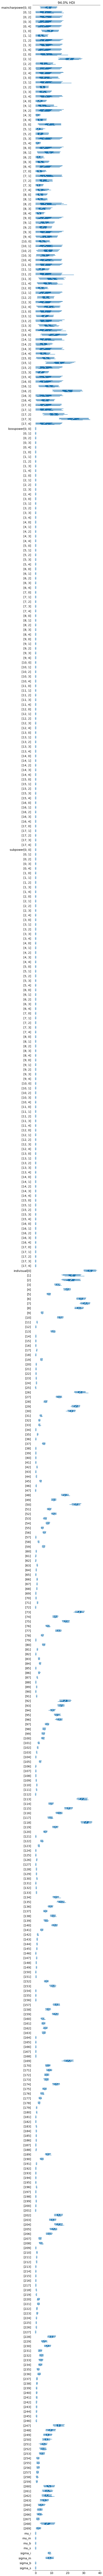

In [24]:
az.plot_forest(fit)

/home/xiangze/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.1.36ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/home/xiangze/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.3.11py3 is an invalid version and will not be supported in a future release
  warnings.warn(
/home/xiangze/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.23ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(


array([[<AxesSubplot:title={'center':'maincharpower'}>,
        <AxesSubplot:title={'center':'maincharpower'}>],
       [<AxesSubplot:title={'center':'bosspower'}>,
        <AxesSubplot:title={'center':'bosspower'}>],
       [<AxesSubplot:title={'center':'subpower'}>,
        <AxesSubplot:title={'center':'subpower'}>],
       [<AxesSubplot:title={'center':'indivisual'}>,
        <AxesSubplot:title={'center':'indivisual'}>],
       [<AxesSubplot:title={'center':'mu_i'}>,
        <AxesSubplot:title={'center':'mu_i'}>],
       [<AxesSubplot:title={'center':'mu_m'}>,
        <AxesSubplot:title={'center':'mu_m'}>],
       [<AxesSubplot:title={'center':'mu_b'}>,
        <AxesSubplot:title={'center':'mu_b'}>],
       [<AxesSubplot:title={'center':'mu_s'}>,
        <AxesSubplot:title={'center':'mu_s'}>],
       [<AxesSubplot:title={'center':'sigma_i'}>,
        <AxesSubplot:title={'center':'sigma_i'}>],
       [<AxesSubplot:title={'center':'sigma_m'}>,
        <AxesSubplot:title={'center':'sig

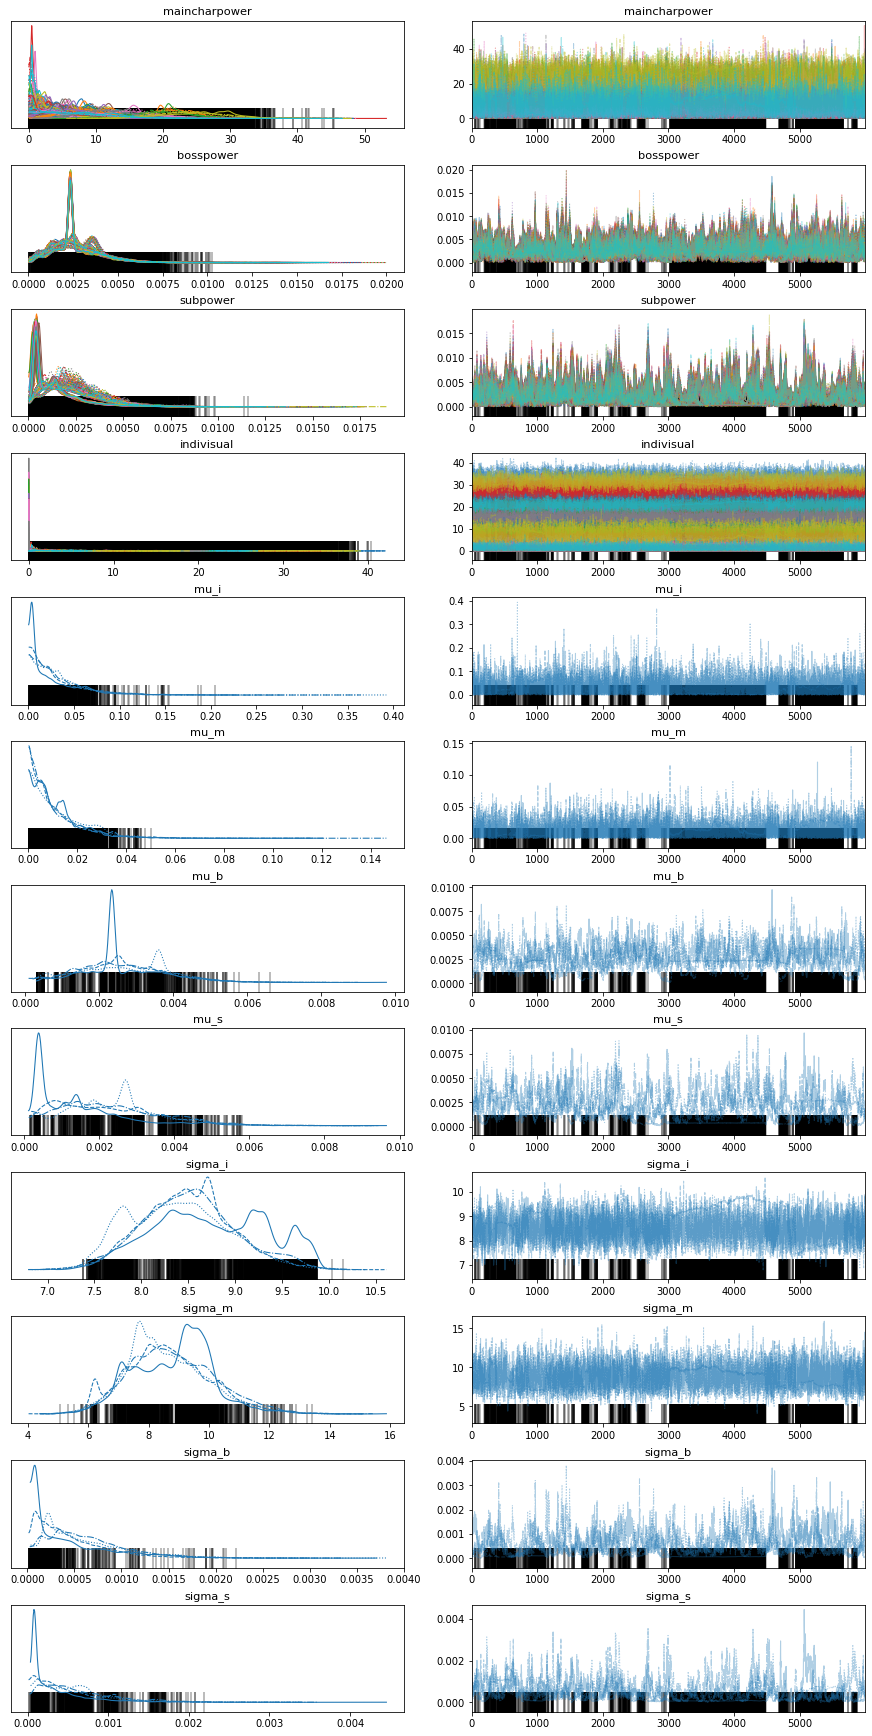

In [25]:
az.plot_trace(fit,backend_kwargs={"constrained_layout":True})

僅かだがsubpower, bosspowerの影響がある。

bosspower, levelには考慮の余地あり

In [ ]:
az.plot_density(fit)
#az.plot_density([],

CSVからインポートする場合

In [45]:
#df=pd.read_csv("postdata//posterior_charm.csv")
#df["chain"] = 3
#df["draw"] = np.arange(len(df), dtype=int)
#df = df.set_index(["chain", "draw"])
#dataset = az.InferenceData(posterior= xr.Dataset.from_dataframe(df))
#dataset

Inference data with groups:
	> posterior

# 整数title,非整数title固有の影響を加味した場合

In [3]:
with open('fit_withtitlesubtitle.pkl', 'rb') as f:
    fit_with= pickle.load(f)
    
summary_with = az.summary(fit_with)
print(summary_with)

/home/xiangze/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.1.36ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/home/xiangze/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.3.11py3 is an invalid version and will not be supported in a future release
  warnings.warn(
/home/xiangze/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.23ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(


                      mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
maincharpower[0, 0]  0.448  0.374   0.013    1.055      0.017    0.012   
maincharpower[0, 1]  0.456  0.388   0.011    1.088      0.021    0.015   
maincharpower[0, 2]  0.450  0.367   0.013    1.057      0.017    0.012   
maincharpower[0, 3]  0.457  0.387   0.009    1.084      0.021    0.015   
maincharpower[0, 4]  0.456  0.379   0.013    1.088      0.020    0.014   
...                    ...    ...     ...      ...        ...      ...   
sigma_i              7.200  0.477   6.326    8.055      0.029    0.020   
sigma_m              0.127  0.150   0.003    0.360      0.009    0.007   
sigma_b              0.046  0.026   0.003    0.091      0.002    0.001   
sigma_s              0.163  0.089   0.009    0.318      0.007    0.005   
sigma_t              0.047  0.048   0.001    0.133      0.002    0.002   

                     ess_bulk  ess_tail  r_hat  
maincharpower[0, 0]     486.0     912.0   1.02  
maincharpower

In [29]:
summary_with.loc["indivisual[0]":"indivisual[30]"]

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
indivisual[0]   36.048  1.992  32.346   39.827      0.059    0.041    1136.0   
indivisual[1]   37.577  2.398  32.934   42.048      0.089    0.063     725.0   
indivisual[2]   37.198  2.469  32.481   41.684      0.119    0.084     439.0   
indivisual[3]   12.737  0.965  10.913   14.536      0.022    0.015    2057.0   
indivisual[4]   17.326  1.186  15.184   19.611      0.041    0.030     890.0   
indivisual[5]    7.356  0.672   6.089    8.608      0.015    0.011    1994.0   
indivisual[6]   25.470  1.584  22.530   28.279      0.100    0.070     253.0   
indivisual[7]   27.443  1.671  24.254   30.424      0.089    0.063     367.0   
indivisual[8]   24.160  1.439  21.539   26.915      0.035    0.025    1722.0   
indivisual[9]    3.862  0.438   3.033    4.680      0.007    0.005    4317.0   
indivisual[10]  13.846  1.001  11.977   15.710      0.026    0.019    1446.0   
indivisual[11]   0.841  0.160   0.555    1.143      0.006    0.005     636.0   
indivisual[12]   0.031  0.007   0.018    0.044      0.000    0.000     390.0   
indivisual[13]   9.873  0.803   8.442   11.391      0.053    0.037     229.0   
indivisual[14]   0.033  0.007   0.020    0.047      0.000    0.000    1267.0   
indivisual[15]   0.029  0.006   0.017    0.041      0.000    0.000    5152.0   
indivisual[16]   0.029  0.007   0.017    0.041      0.000    0.000    3482.0   
indivisual[17]   0.651  0.125   0.422    0.892      0.001    0.001    7415.0   
indivisual[18]   0.029  0.006   0.017    0.041      0.000    0.000    2147.0   
indivisual[19]   3.217  0.410   2.478    4.018      0.007    0.005    3578.0   
indivisual[20]   0.293  0.064   0.180    0.423      0.001    0.001    3061.0   
indivisual[21]   0.199  0.044   0.114    0.280      0.001    0.001    2291.0   
indivisual[22]   0.222  0.050   0.133    0.321      0.001    0.001    1482.0   
indivisual[23]   0.299  0.065   0.183    0.424      0.001    0.001    2366.0   
indivisual[24]   0.461  0.095   0.290    0.643      0.002    0.001    2838.0   
indivisual[25]   0.030  0.007   0.018    0.043      0.000    0.000     335.0   
indivisual[26]  30.414  1.781  27.141   33.817      0.069    0.049     652.0   
indivisual[27]  12.828  0.963  11.163   14.787      0.021    0.015    2207.0   
indivisual[28]   5.601  0.656   4.193    6.663      0.078    0.055      76.0   
indivisual[29]  22.258  1.426  19.735   25.108      0.040    0.029    1334.0   
indivisual[30]  19.333  1.315  16.824   21.793      0.032    0.023    1777.0   

                ess_tail  r_hat  
indivisual[0]     2629.0   1.00  
indivisual[1]      680.0   1.01  
indivisual[2]      439.0   1.01  
indivisual[3]     6715.0   1.01  
indivisual[4]      930.0   1.01  
indivisual[5]     4560.0   1.01  
indivisual[6]     1169.0   1.02  
indivisual[7]      617.0   1.01  
indivisual[8]     4965.0   1.00  
indivisual[9]    10508.0   1.01  
indivisual[10]    7564.0   1.00  
indivisual[11]   10981.0   1.01  
indivisual[12]    5261.0   1.01  
indivisual[13]    4058.0   1.02  
indivisual[14]    6292.0   1.00  
indivisual[15]    8576.0   1.02  
indivisual[16]    6408.0   1.00  
indivisual[17]   11279.0   1.01  
indivisual[18]    3345.0   1.00  
indivisual[19]    9425.0   1.00  
indivisual[20]     863.0   1.01  
indivisual[21]     847.0   1.00  
indivisual[22]     813.0   1.01  
indivisual[23]    4248.0   1.00  
indivisual[24]    3121.0   1.00  
indivisual[25]    1434.0   1.01  
indivisual[26]    4716.0   1.01  
indivisual[27]    2119.0   1.01  
indivisual[28]      19.0   1.04  
indivisual[29]     748.0   1.01  
indivisual[30]    5138.0   1.00

In [14]:
summary_with.to_csv("postdata/summary_withtitlesubtitle.csv")

/home/xiangze/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.1.36ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/home/xiangze/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.3.11py3 is an invalid version and will not be supported in a future release
  warnings.warn(
/home/xiangze/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.23ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(


array([<AxesSubplot:title={'center':'94.0% HDI'}>], dtype=object)

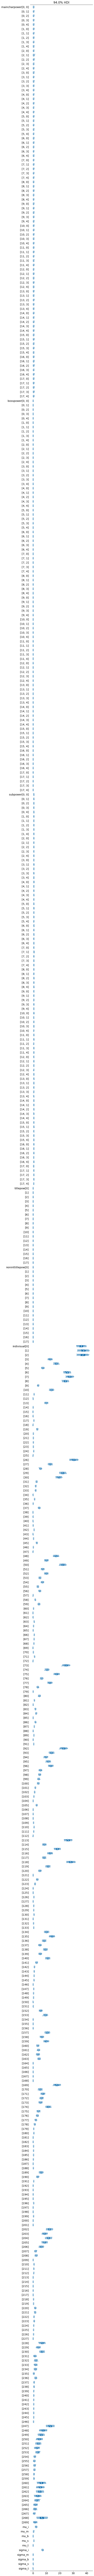

In [4]:
az.plot_forest(fit_with)

/home/xiangze/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.1.36ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/home/xiangze/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.3.11py3 is an invalid version and will not be supported in a future release
  warnings.warn(
/home/xiangze/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.23ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/home/xiangze/.local/lib/python3.8/site-packages/arviz/plots/plot_utils.py:271: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of variables to plot (586) in plot_posterior, generating only 40 plots
  warnings.warn(


array([[<AxesSubplot:title={'center':'maincharpower\n0, 0'}>,
        <AxesSubplot:title={'center':'maincharpower\n0, 1'}>,
        <AxesSubplot:title={'center':'maincharpower\n0, 2'}>,
        <AxesSubplot:title={'center':'maincharpower\n0, 3'}>],
       [<AxesSubplot:title={'center':'maincharpower\n0, 4'}>,
        <AxesSubplot:title={'center':'maincharpower\n1, 0'}>,
        <AxesSubplot:title={'center':'maincharpower\n1, 1'}>,
        <AxesSubplot:title={'center':'maincharpower\n1, 2'}>],
       [<AxesSubplot:title={'center':'maincharpower\n1, 3'}>,
        <AxesSubplot:title={'center':'maincharpower\n1, 4'}>,
        <AxesSubplot:title={'center':'maincharpower\n2, 0'}>,
        <AxesSubplot:title={'center':'maincharpower\n2, 1'}>],
       [<AxesSubplot:title={'center':'maincharpower\n2, 2'}>,
        <AxesSubplot:title={'center':'maincharpower\n2, 3'}>,
        <AxesSubplot:title={'center':'maincharpower\n2, 4'}>,
        <AxesSubplot:title={'center':'maincharpower\n3, 0'}>],
    

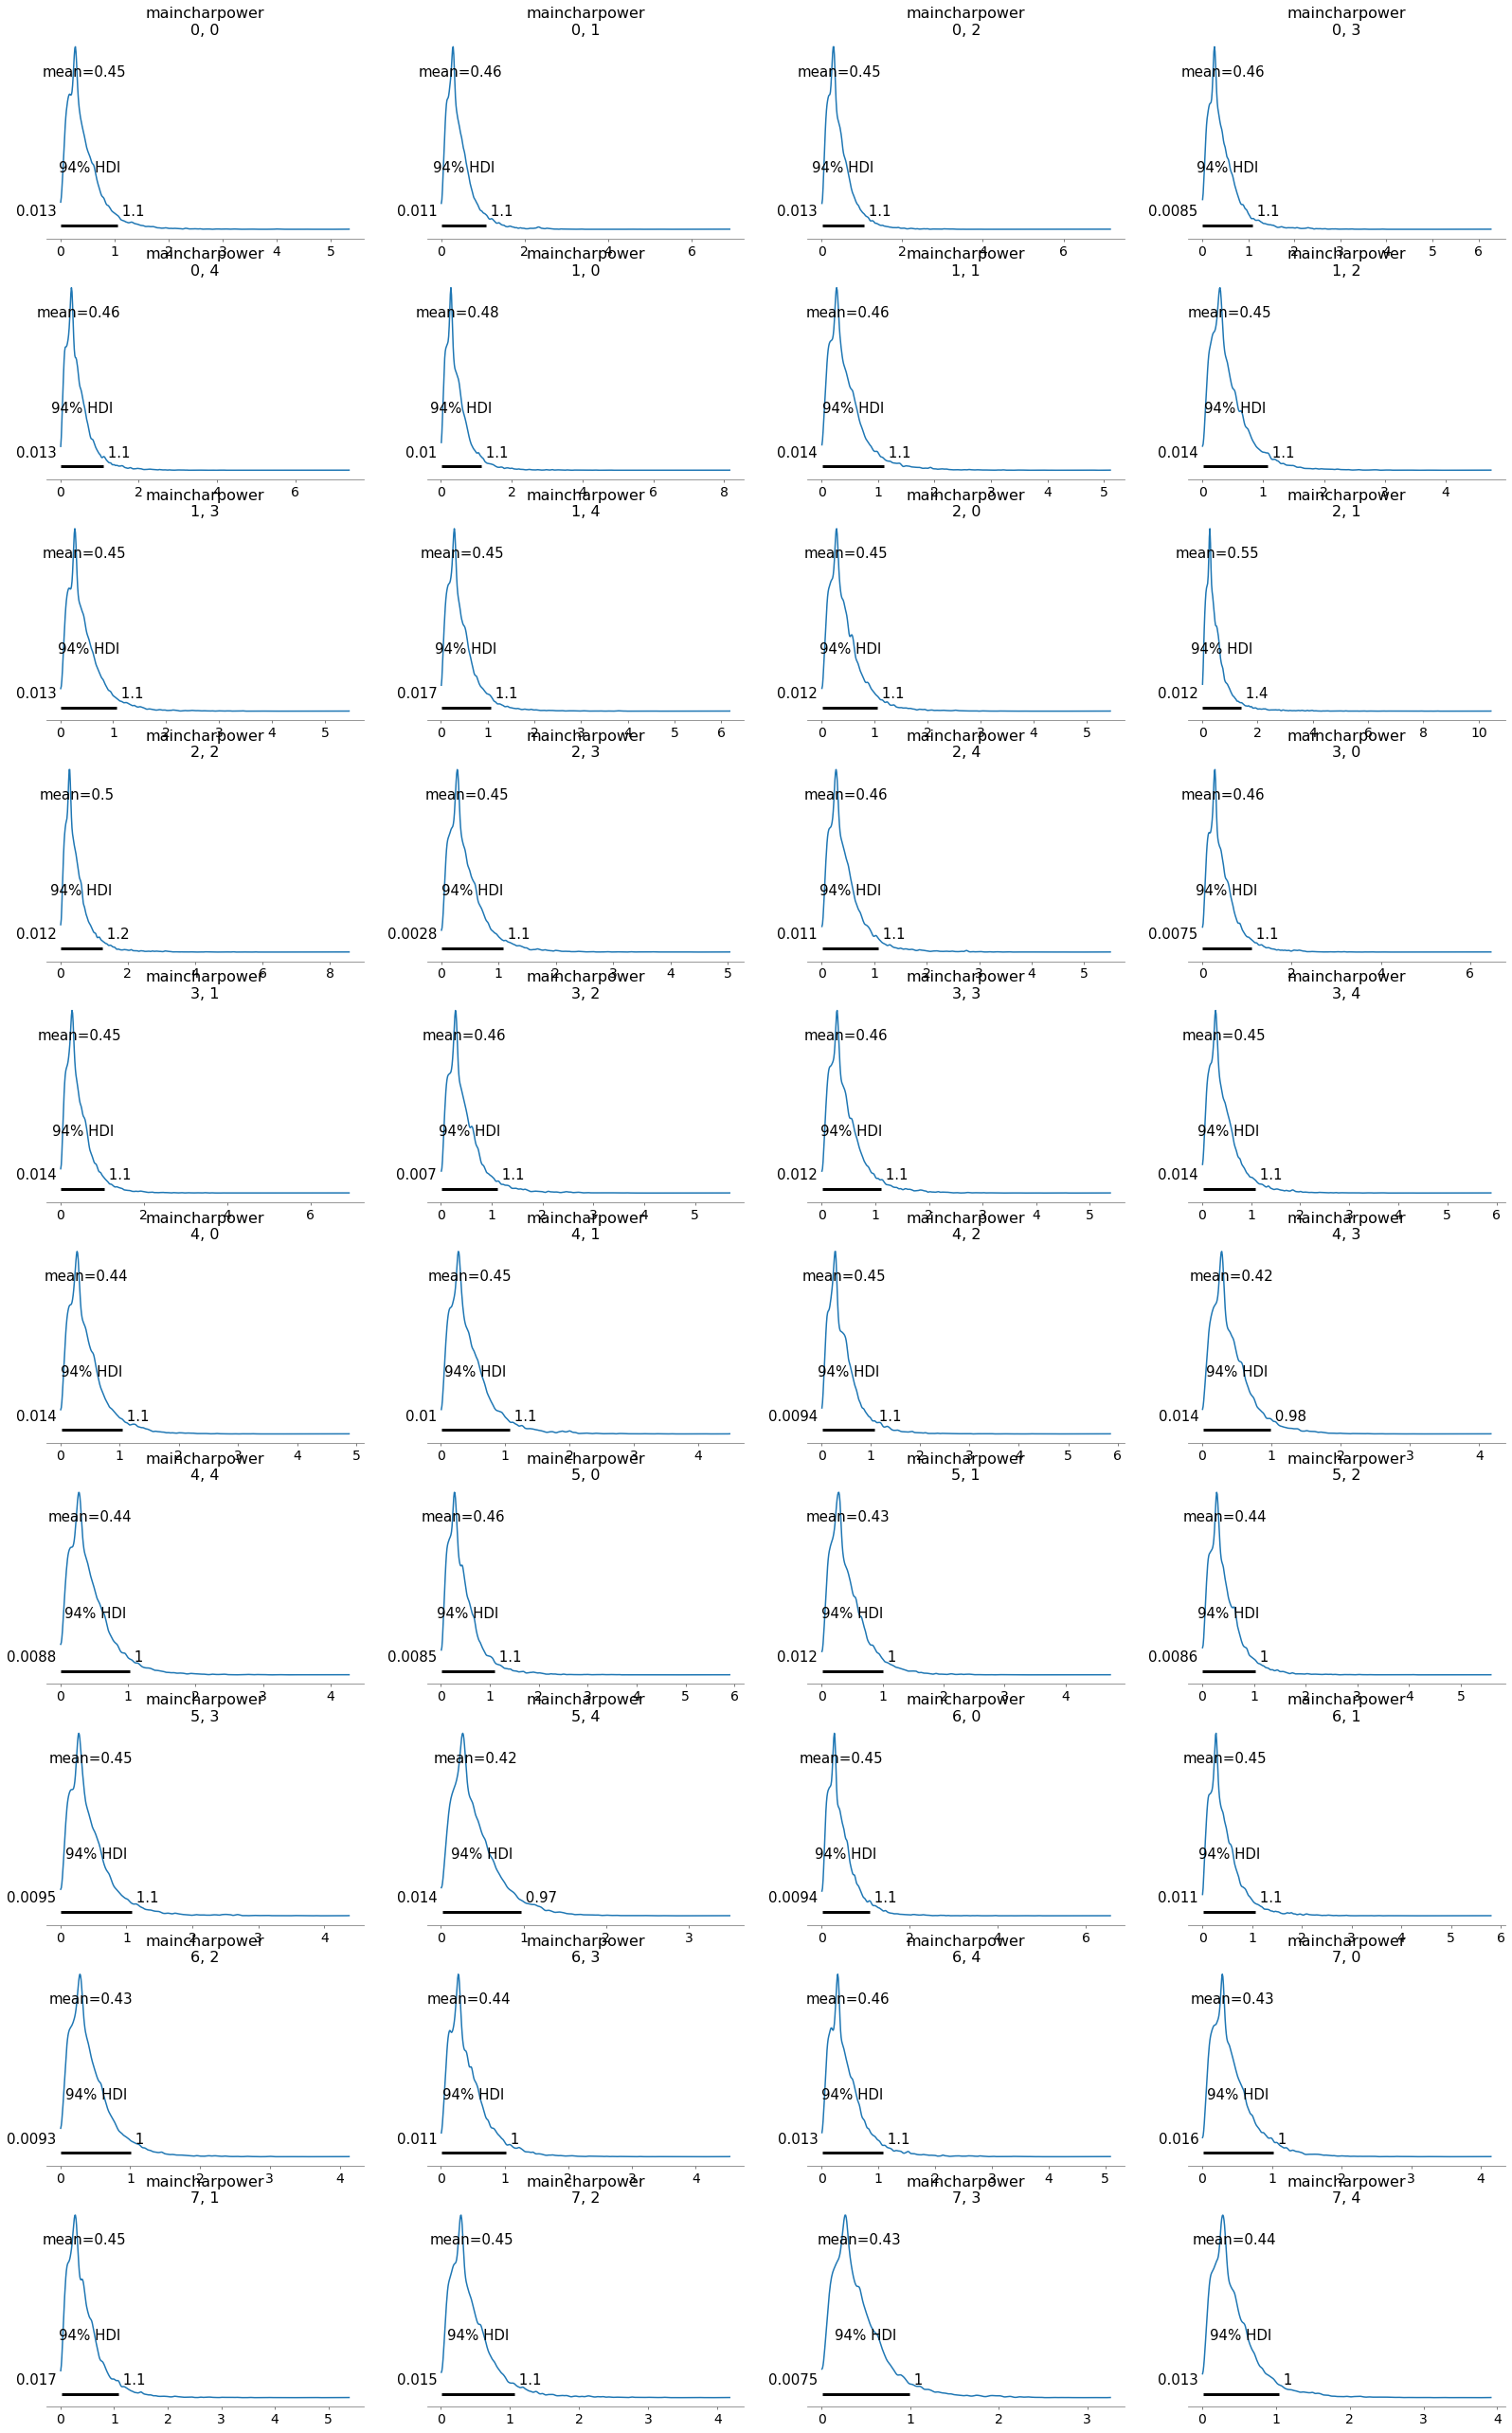

In [6]:
az.plot_posterior(fit_with)

/home/xiangze/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.1.36ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/home/xiangze/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.3.11py3 is an invalid version and will not be supported in a future release
  warnings.warn(
/home/xiangze/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.23ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(


array([[<AxesSubplot:title={'center':'maincharpower'}>,
        <AxesSubplot:title={'center':'maincharpower'}>],
       [<AxesSubplot:title={'center':'bosspower'}>,
        <AxesSubplot:title={'center':'bosspower'}>],
       [<AxesSubplot:title={'center':'subpower'}>,
        <AxesSubplot:title={'center':'subpower'}>],
       [<AxesSubplot:title={'center':'titlepow'}>,
        <AxesSubplot:title={'center':'titlepow'}>],
       [<AxesSubplot:title={'center':'noninttitlepow'}>,
        <AxesSubplot:title={'center':'noninttitlepow'}>],
       [<AxesSubplot:title={'center':'indivisual'}>,
        <AxesSubplot:title={'center':'indivisual'}>],
       [<AxesSubplot:title={'center':'mu_i'}>,
        <AxesSubplot:title={'center':'mu_i'}>],
       [<AxesSubplot:title={'center':'mu_m'}>,
        <AxesSubplot:title={'center':'mu_m'}>],
       [<AxesSubplot:title={'center':'mu_b'}>,
        <AxesSubplot:title={'center':'mu_b'}>],
       [<AxesSubplot:title={'center':'mu_s'}>,
        <AxesSubplot:t

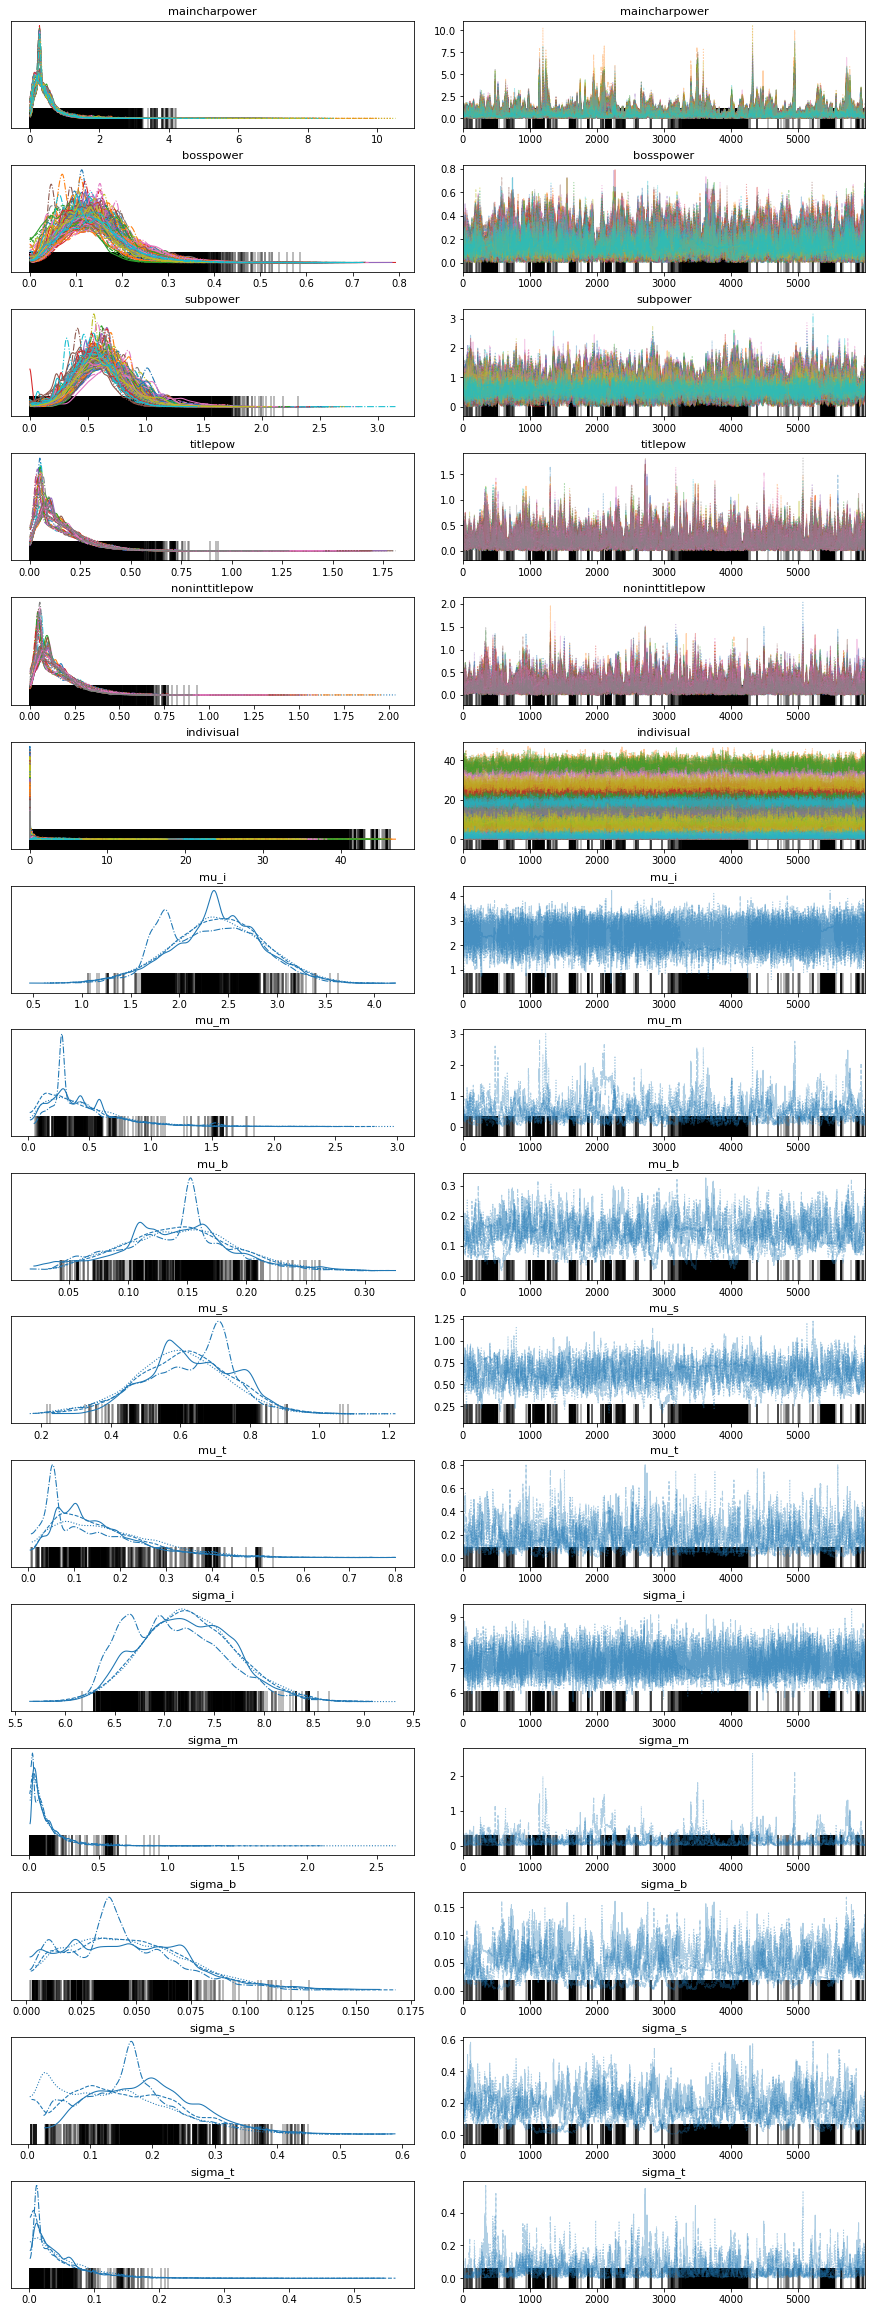

In [7]:
az.plot_trace(fit_with,backend_kwargs={"constrained_layout":True})

/home/xiangze/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.1.36ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/home/xiangze/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.3.11py3 is an invalid version and will not be supported in a future release
  warnings.warn(
/home/xiangze/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.23ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(


array([<AxesSubplot:title={'center':'94.0% HDI'}>], dtype=object)

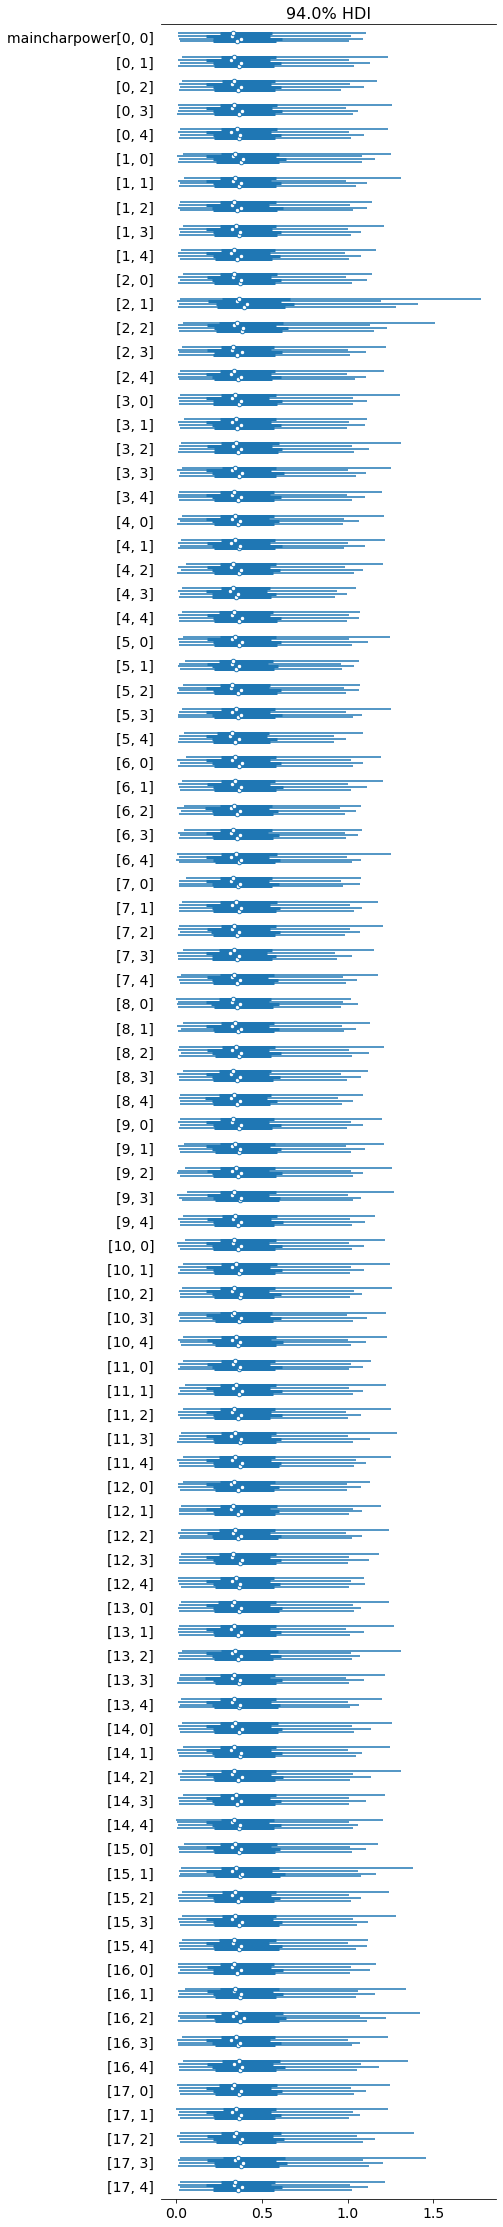

In [8]:
az.plot_forest(fit_with, var_names="maincharpower")

/home/xiangze/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.1.36ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/home/xiangze/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.3.11py3 is an invalid version and will not be supported in a future release
  warnings.warn(
/home/xiangze/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.23ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(


array([<AxesSubplot:title={'center':'94.0% HDI'}>], dtype=object)

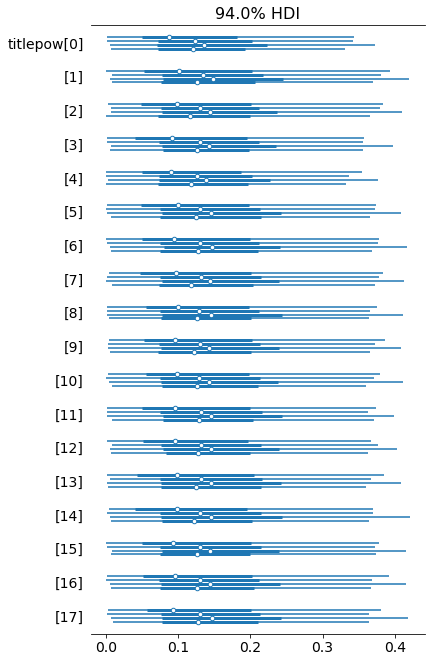

In [9]:
az.plot_forest(fit_with, var_names="titlepow")

/home/xiangze/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.1.36ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/home/xiangze/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.3.11py3 is an invalid version and will not be supported in a future release
  warnings.warn(
/home/xiangze/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.23ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(


array([[<AxesSubplot:title={'center':'titlepow\n0'}>,
        <AxesSubplot:title={'center':'titlepow\n1'}>,
        <AxesSubplot:title={'center':'titlepow\n2'}>],
       [<AxesSubplot:title={'center':'titlepow\n3'}>,
        <AxesSubplot:title={'center':'titlepow\n4'}>,
        <AxesSubplot:title={'center':'titlepow\n5'}>],
       [<AxesSubplot:title={'center':'titlepow\n6'}>,
        <AxesSubplot:title={'center':'titlepow\n7'}>,
        <AxesSubplot:title={'center':'titlepow\n8'}>],
       [<AxesSubplot:title={'center':'titlepow\n9'}>,
        <AxesSubplot:title={'center':'titlepow\n10'}>,
        <AxesSubplot:title={'center':'titlepow\n11'}>],
       [<AxesSubplot:title={'center':'titlepow\n12'}>,
        <AxesSubplot:title={'center':'titlepow\n13'}>,
        <AxesSubplot:title={'center':'titlepow\n14'}>],
       [<AxesSubplot:title={'center':'titlepow\n15'}>,
        <AxesSubplot:title={'center':'titlepow\n16'}>,
        <AxesSubplot:title={'center':'titlepow\n17'}>]], dtype=object)

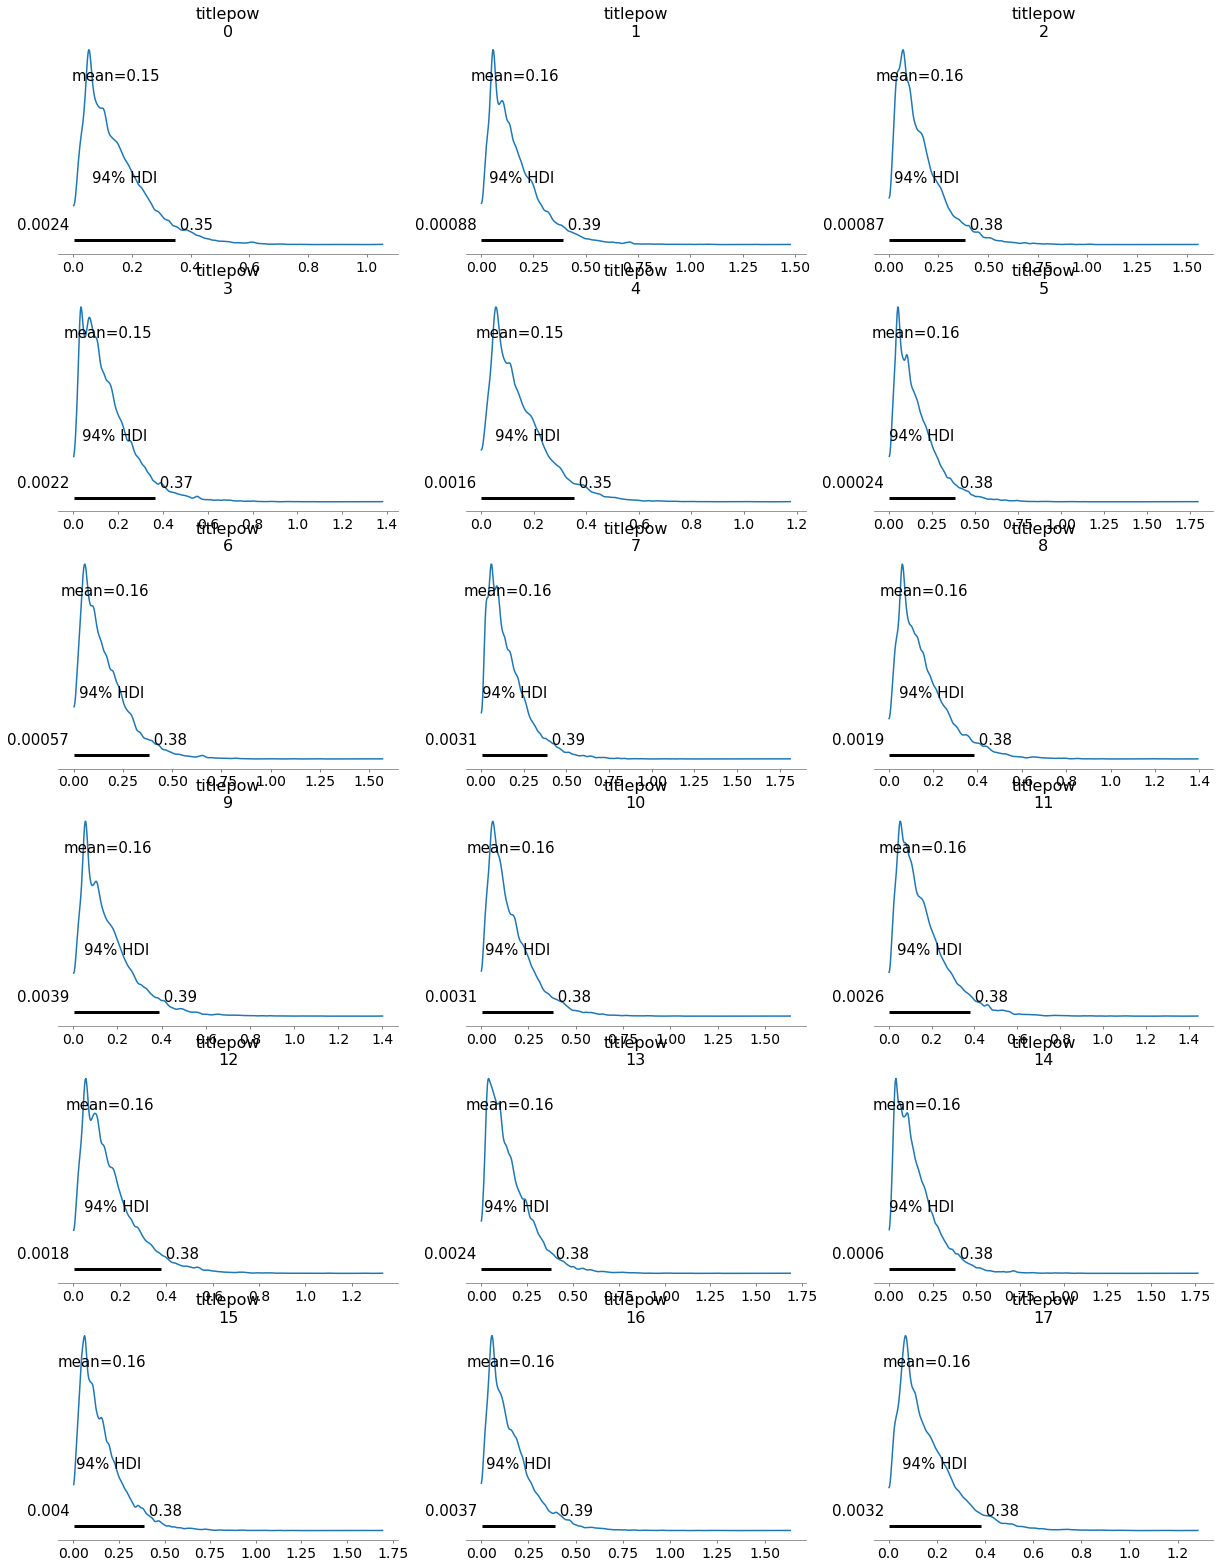

In [12]:
az.plot_posterior(fit_with, var_names="titlepow")

/home/xiangze/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.1.36ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/home/xiangze/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.3.11py3 is an invalid version and will not be supported in a future release
  warnings.warn(
/home/xiangze/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.23ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(


array([<AxesSubplot:title={'center':'94.0% HDI'}>], dtype=object)

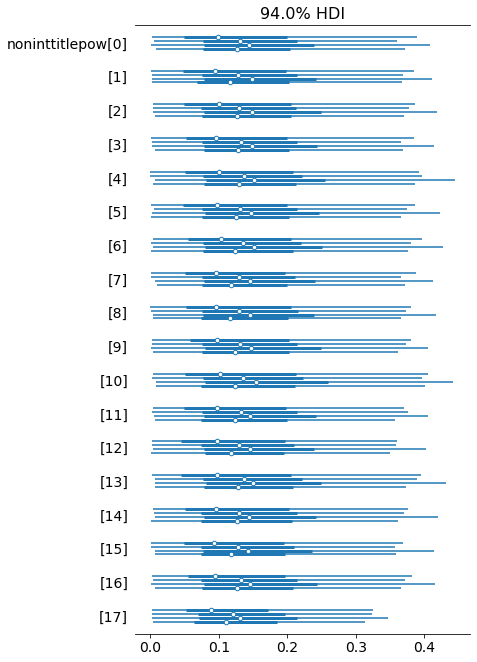

In [11]:
az.plot_forest(fit_with, var_names="noninttitlepow")

/home/xiangze/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.1.36ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/home/xiangze/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.3.11py3 is an invalid version and will not be supported in a future release
  warnings.warn(
/home/xiangze/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.23ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(


array([<AxesSubplot:title={'center':'94.0% HDI'}>], dtype=object)

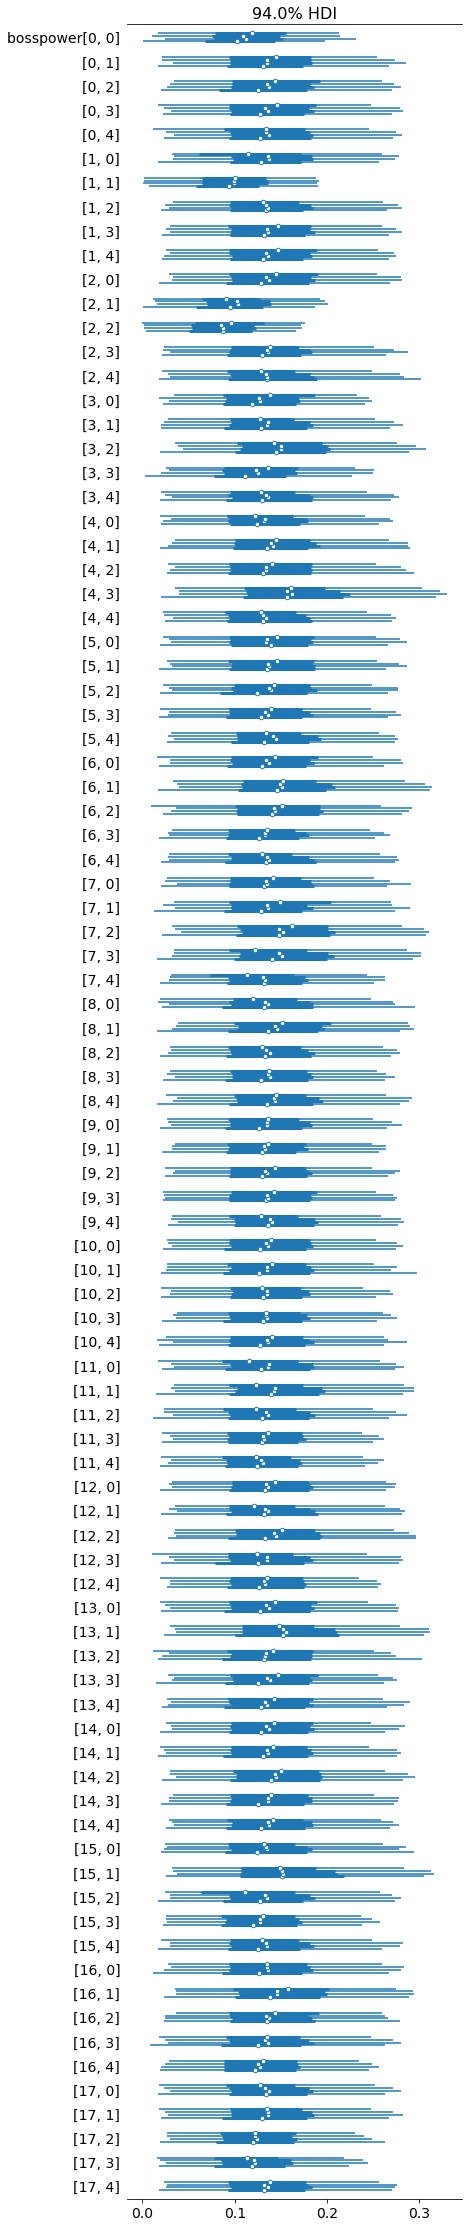

In [10]:
az.plot_forest(fit_with, var_names="bosspower")

/home/xiangze/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.1.36ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/home/xiangze/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.3.11py3 is an invalid version and will not be supported in a future release
  warnings.warn(
/home/xiangze/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.23ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/home/xiangze/.local/lib/python3.8/site-packages/arviz/plots/plot_utils.py:271: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of variables to plot (90) in plot_posterior, generating only 40 plots
  warnings.warn(


array([[<AxesSubplot:title={'center':'bosspower\n0, 0'}>,
        <AxesSubplot:title={'center':'bosspower\n0, 1'}>,
        <AxesSubplot:title={'center':'bosspower\n0, 2'}>,
        <AxesSubplot:title={'center':'bosspower\n0, 3'}>],
       [<AxesSubplot:title={'center':'bosspower\n0, 4'}>,
        <AxesSubplot:title={'center':'bosspower\n1, 0'}>,
        <AxesSubplot:title={'center':'bosspower\n1, 1'}>,
        <AxesSubplot:title={'center':'bosspower\n1, 2'}>],
       [<AxesSubplot:title={'center':'bosspower\n1, 3'}>,
        <AxesSubplot:title={'center':'bosspower\n1, 4'}>,
        <AxesSubplot:title={'center':'bosspower\n2, 0'}>,
        <AxesSubplot:title={'center':'bosspower\n2, 1'}>],
       [<AxesSubplot:title={'center':'bosspower\n2, 2'}>,
        <AxesSubplot:title={'center':'bosspower\n2, 3'}>,
        <AxesSubplot:title={'center':'bosspower\n2, 4'}>,
        <AxesSubplot:title={'center':'bosspower\n3, 0'}>],
       [<AxesSubplot:title={'center':'bosspower\n3, 1'}>,
        <A

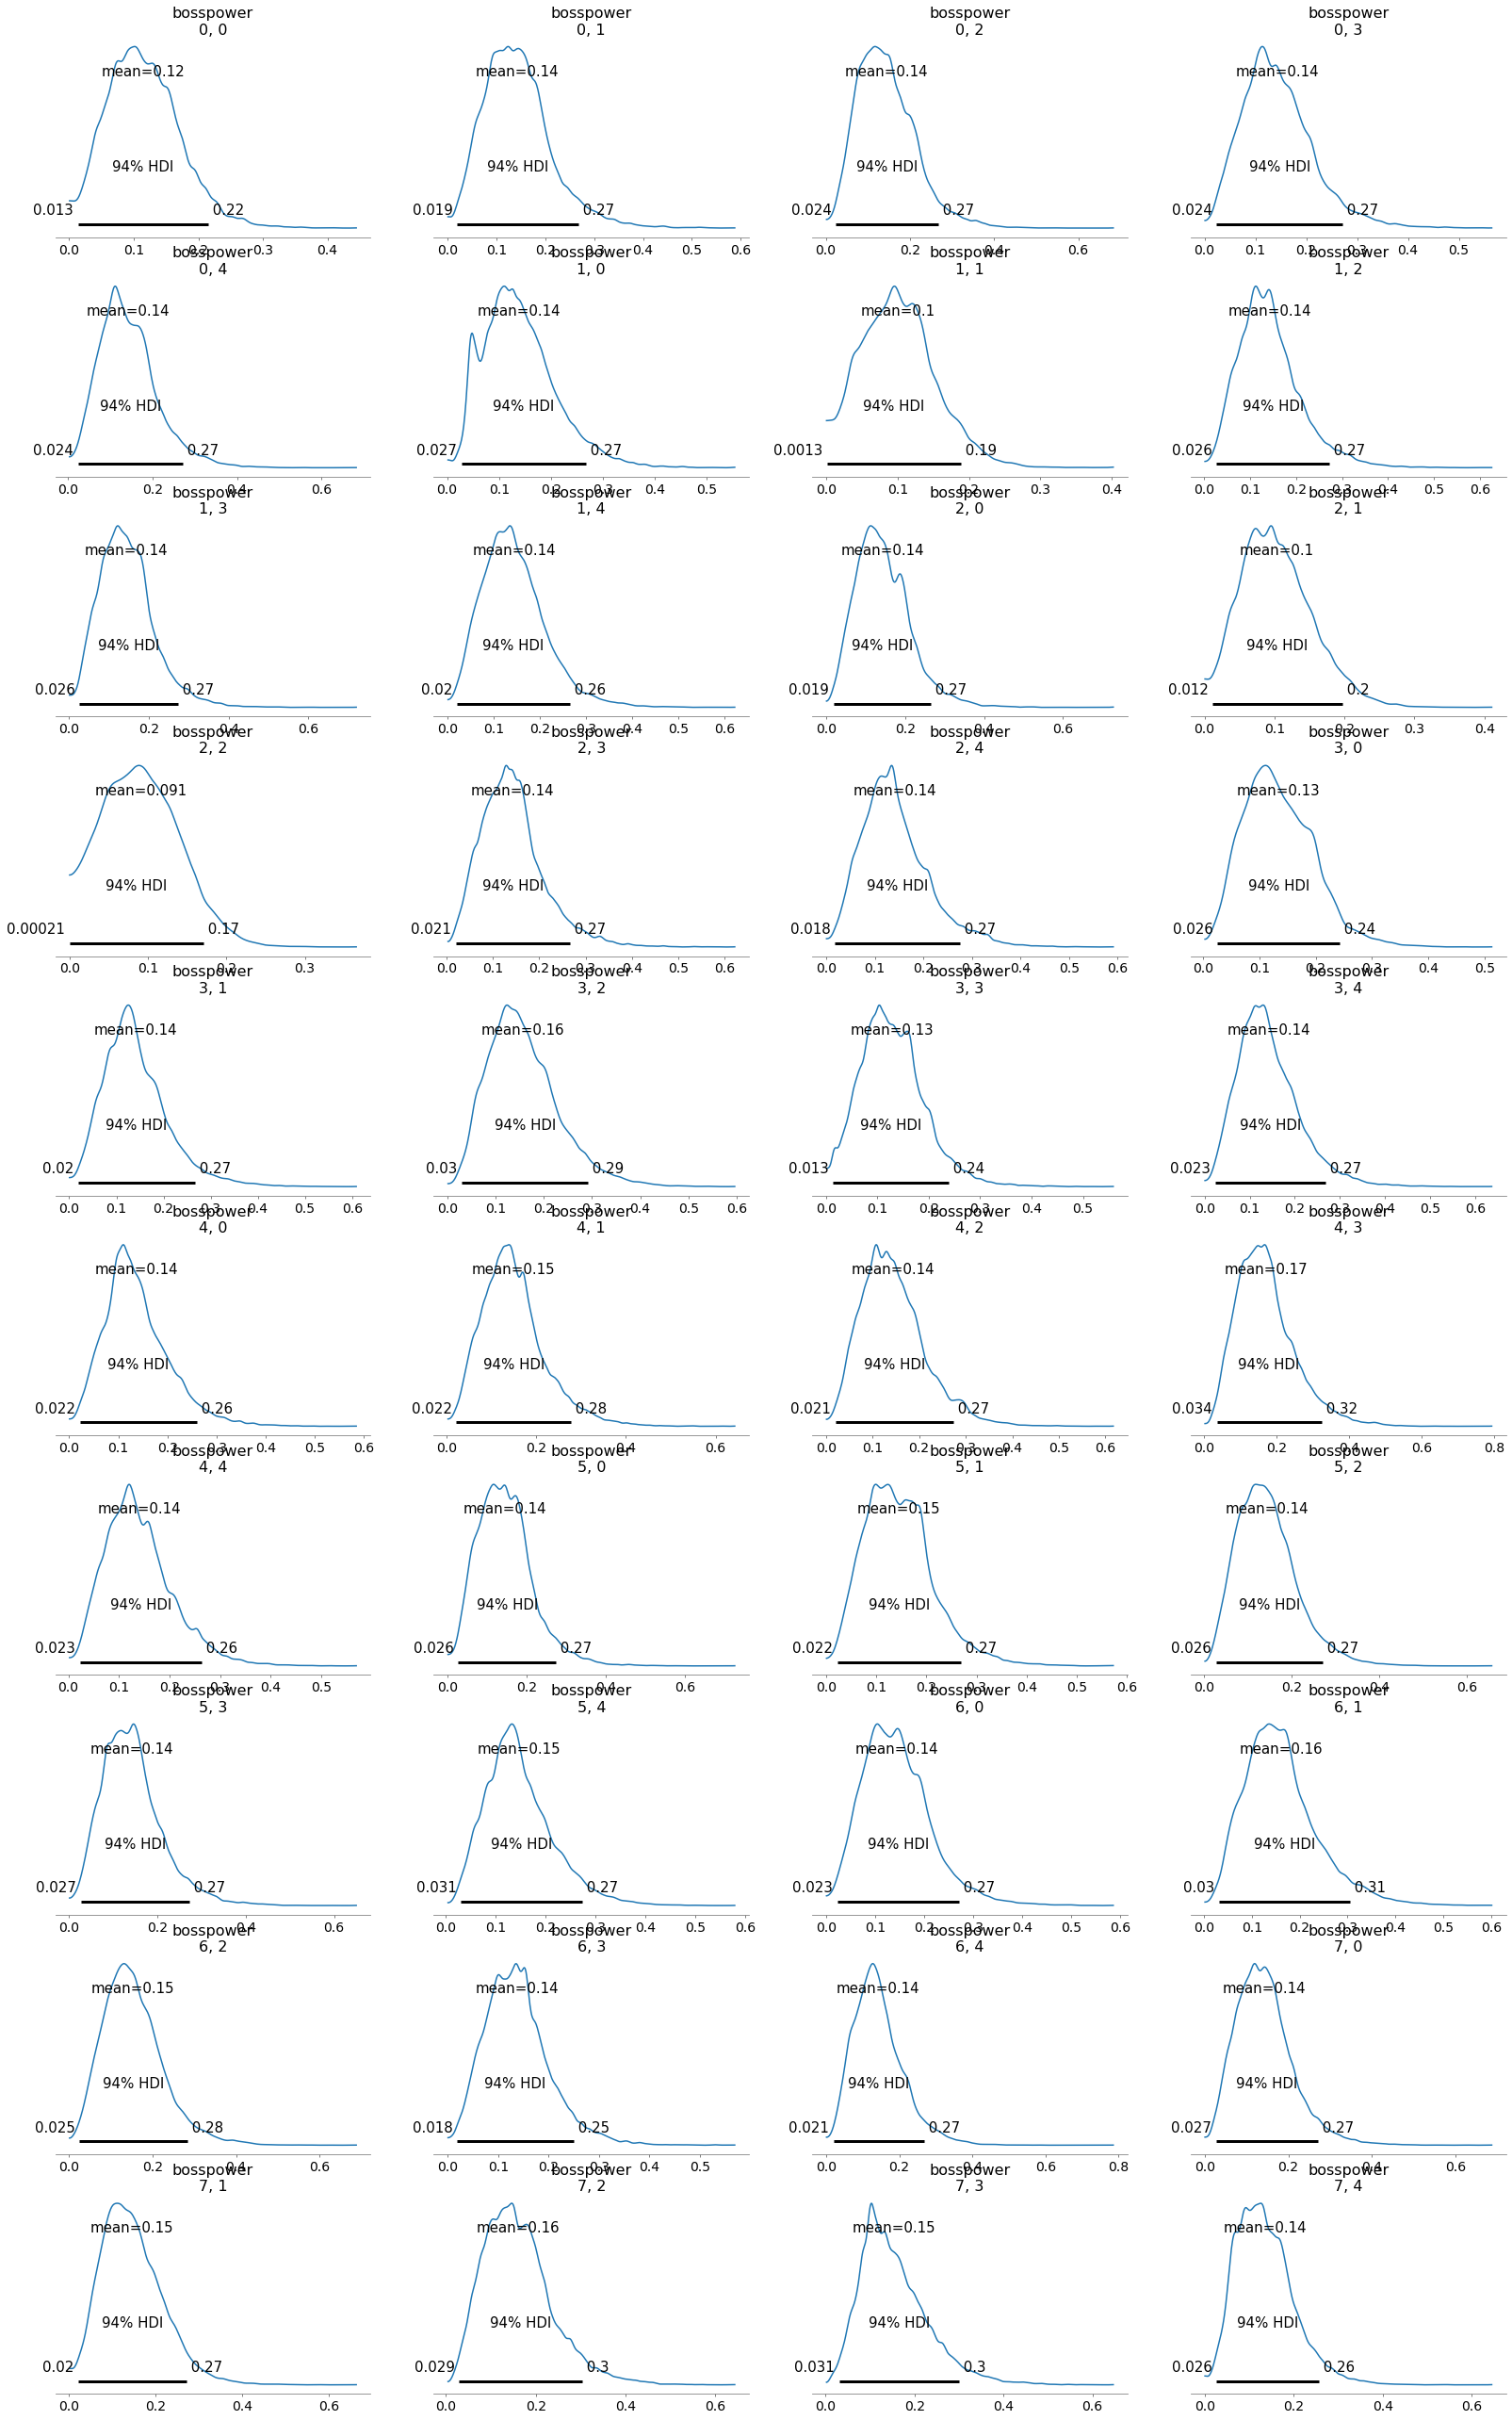

In [30]:
az.plot_posterior(fit_with, var_names="bosspower")

# 和,indivisualを絞り込む

In [6]:
with open('fit_sumindivisualinline.pkl', 'rb') as f:
    fit_sumindivisualinline= pickle.load(f)

/home/xiangze/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.1.36ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/home/xiangze/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.3.11py3 is an invalid version and will not be supported in a future release
  warnings.warn(
/home/xiangze/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.23ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(


array([<AxesSubplot:title={'center':'94.0% HDI'}>], dtype=object)

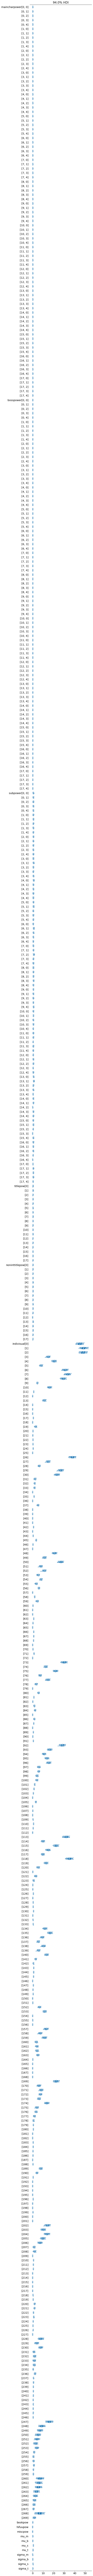

In [7]:
az.plot_forest(fit_sumindivisualinline)

絞り込めなかった

/home/xiangze/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.1.36ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/home/xiangze/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.3.11py3 is an invalid version and will not be supported in a future release
  warnings.warn(
/home/xiangze/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.23ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(


array([<AxesSubplot:title={'center':'94.0% HDI'}>], dtype=object)

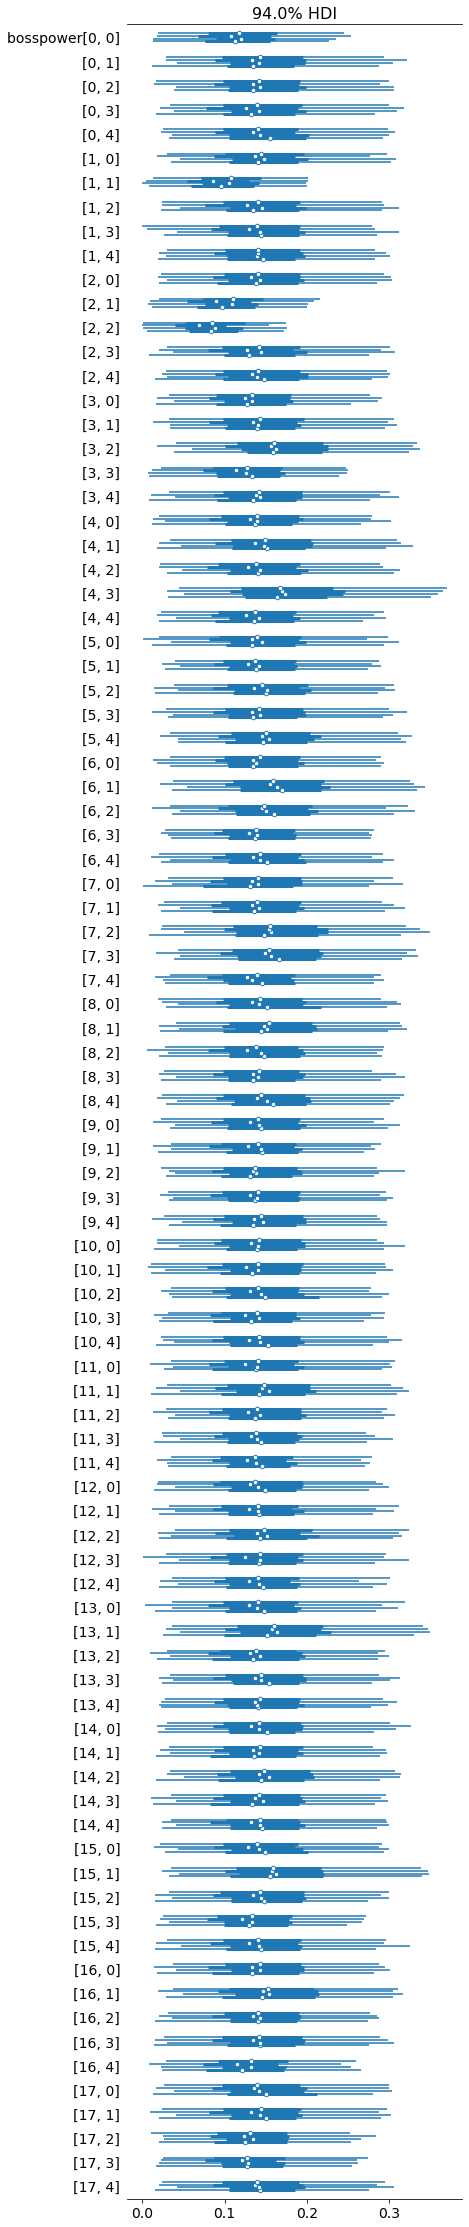

In [10]:
az.plot_forest(fit_sumindivisualinline,var_names="bosspower")

/home/xiangze/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.1.36ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/home/xiangze/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.3.11py3 is an invalid version and will not be supported in a future release
  warnings.warn(
/home/xiangze/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.23ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(


array([[<AxesSubplot:title={'center':'maincharpower'}>,
        <AxesSubplot:title={'center':'maincharpower'}>],
       [<AxesSubplot:title={'center':'bosspower'}>,
        <AxesSubplot:title={'center':'bosspower'}>],
       [<AxesSubplot:title={'center':'subpower'}>,
        <AxesSubplot:title={'center':'subpower'}>],
       [<AxesSubplot:title={'center':'titlepow'}>,
        <AxesSubplot:title={'center':'titlepow'}>],
       [<AxesSubplot:title={'center':'noninttitlepow'}>,
        <AxesSubplot:title={'center':'noninttitlepow'}>],
       [<AxesSubplot:title={'center':'indivisual'}>,
        <AxesSubplot:title={'center':'indivisual'}>],
       [<AxesSubplot:title={'center':'bookpow'}>,
        <AxesSubplot:title={'center':'bookpow'}>],
       [<AxesSubplot:title={'center':'hifuupow'}>,
        <AxesSubplot:title={'center':'hifuupow'}>],
       [<AxesSubplot:title={'center':'miscpow'}>,
        <AxesSubplot:title={'center':'miscpow'}>],
       [<AxesSubplot:title={'center':'mu_m'}>,
  

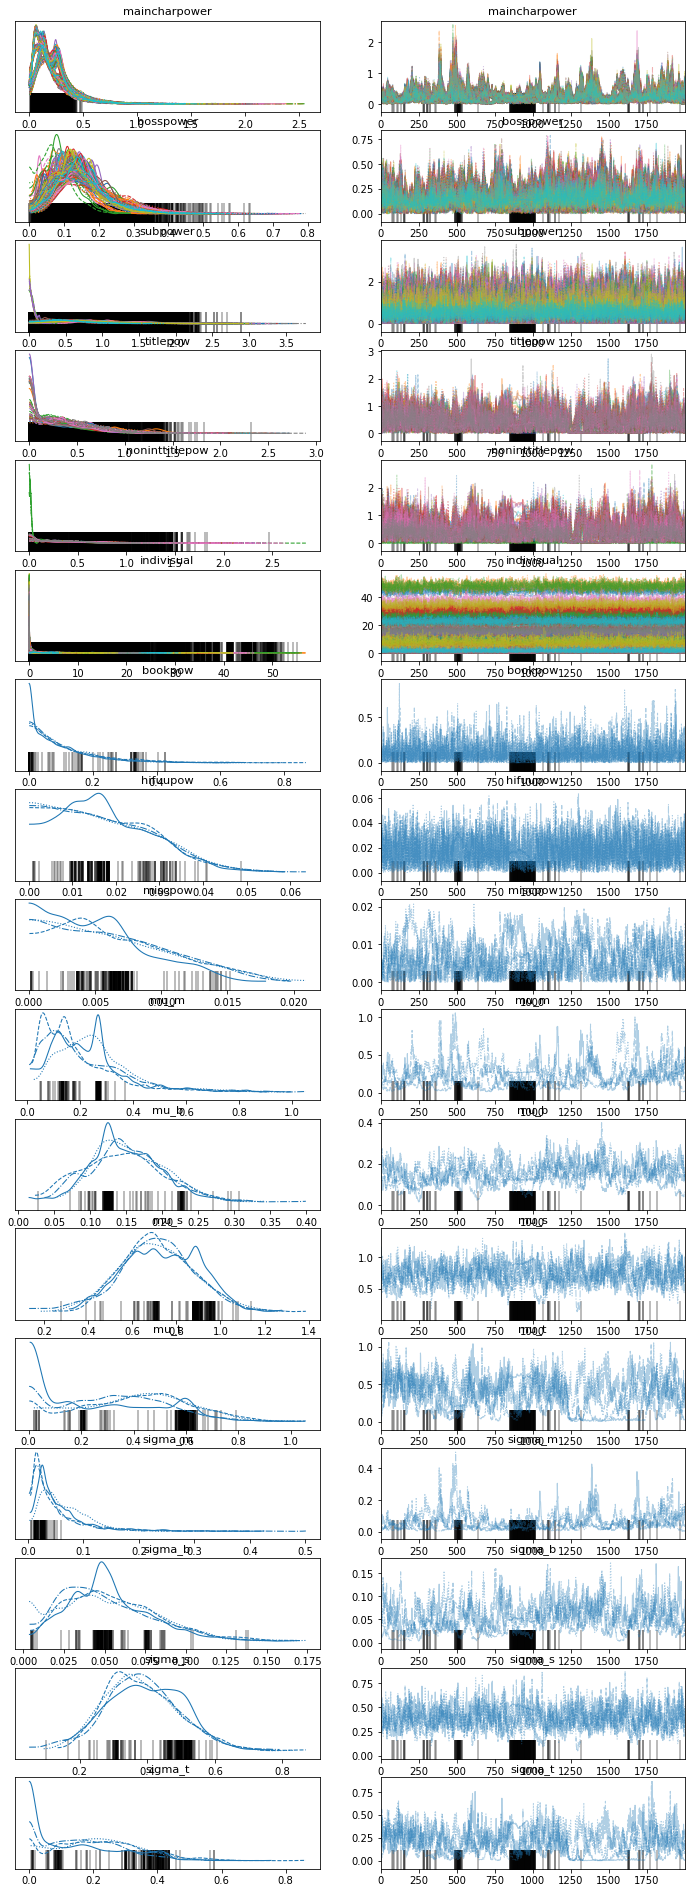

In [8]:
az.plot_trace(fit_sumindivisualinline)

# 積和型

 失敗 Rhatが収束していない

In [3]:
with open('fit_prodsuminline.pkl', 'rb') as f:
    fit_prodsuminline= pickle.load(f)
    
#summary_prodsuminline = az.summary(fit_prodsuminline)
#print(summary_with)

/home/xiangze/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.1.36ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/home/xiangze/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.3.11py3 is an invalid version and will not be supported in a future release
  warnings.warn(
/home/xiangze/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.23ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/home/xiangze/.local/lib/python3.8/site-packages/matplotlib/axes/_base.py:2740: RuntimeWarning: overflow encountered in double_scalars
  x0, x1 = inverse_trans.transform([x0t - delta, x1t + delta])


array([<AxesSubplot:title={'center':'94.0% HDI'}>], dtype=object)

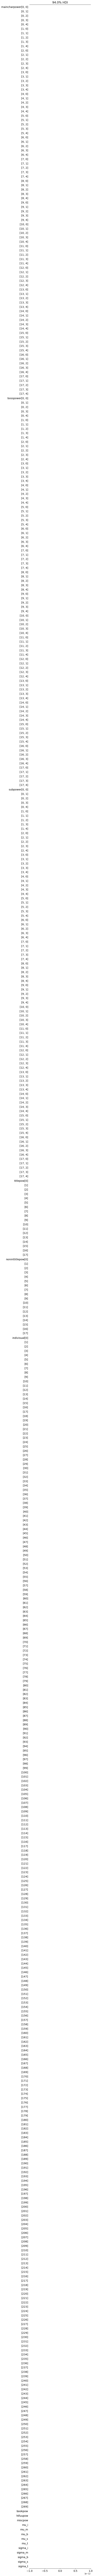

In [4]:
az.plot_forest(fit_prodsuminline)

/home/xiangze/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.1.36ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/home/xiangze/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.3.11py3 is an invalid version and will not be supported in a future release
  warnings.warn(
/home/xiangze/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.23ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/home/xiangze/.local/lib/python3.8/site-packages/numpy/core/_methods.py:212: RuntimeWarning: overflow encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True, where=where)
/home/xiangze/.local/lib/python3.8/site-packages/arviz/stats/density_utils.py:988: RuntimeWarning: overflow encountered in multiply
  hist_dens = hist / (hist.sum() * np.diff(bin_edge

array([[<AxesSubplot:title={'center':'maincharpower'}>,
        <AxesSubplot:title={'center':'maincharpower'}>],
       [<AxesSubplot:title={'center':'bosspower'}>,
        <AxesSubplot:title={'center':'bosspower'}>],
       [<AxesSubplot:title={'center':'subpower'}>,
        <AxesSubplot:title={'center':'subpower'}>],
       [<AxesSubplot:title={'center':'titlepow'}>,
        <AxesSubplot:title={'center':'titlepow'}>],
       [<AxesSubplot:title={'center':'noninttitlepow'}>,
        <AxesSubplot:title={'center':'noninttitlepow'}>],
       [<AxesSubplot:title={'center':'indivisual'}>,
        <AxesSubplot:title={'center':'indivisual'}>],
       [<AxesSubplot:title={'center':'bookpow'}>,
        <AxesSubplot:title={'center':'bookpow'}>],
       [<AxesSubplot:title={'center':'hifuupow'}>,
        <AxesSubplot:title={'center':'hifuupow'}>],
       [<AxesSubplot:title={'center':'miscpow'}>,
        <AxesSubplot:title={'center':'miscpow'}>],
       [<AxesSubplot:title={'center':'mu_i'}>,
  

/home/xiangze/.local/lib/python3.8/site-packages/matplotlib/axes/_base.py:2740: RuntimeWarning: overflow encountered in double_scalars
  x0, x1 = inverse_trans.transform([x0t - delta, x1t + delta])


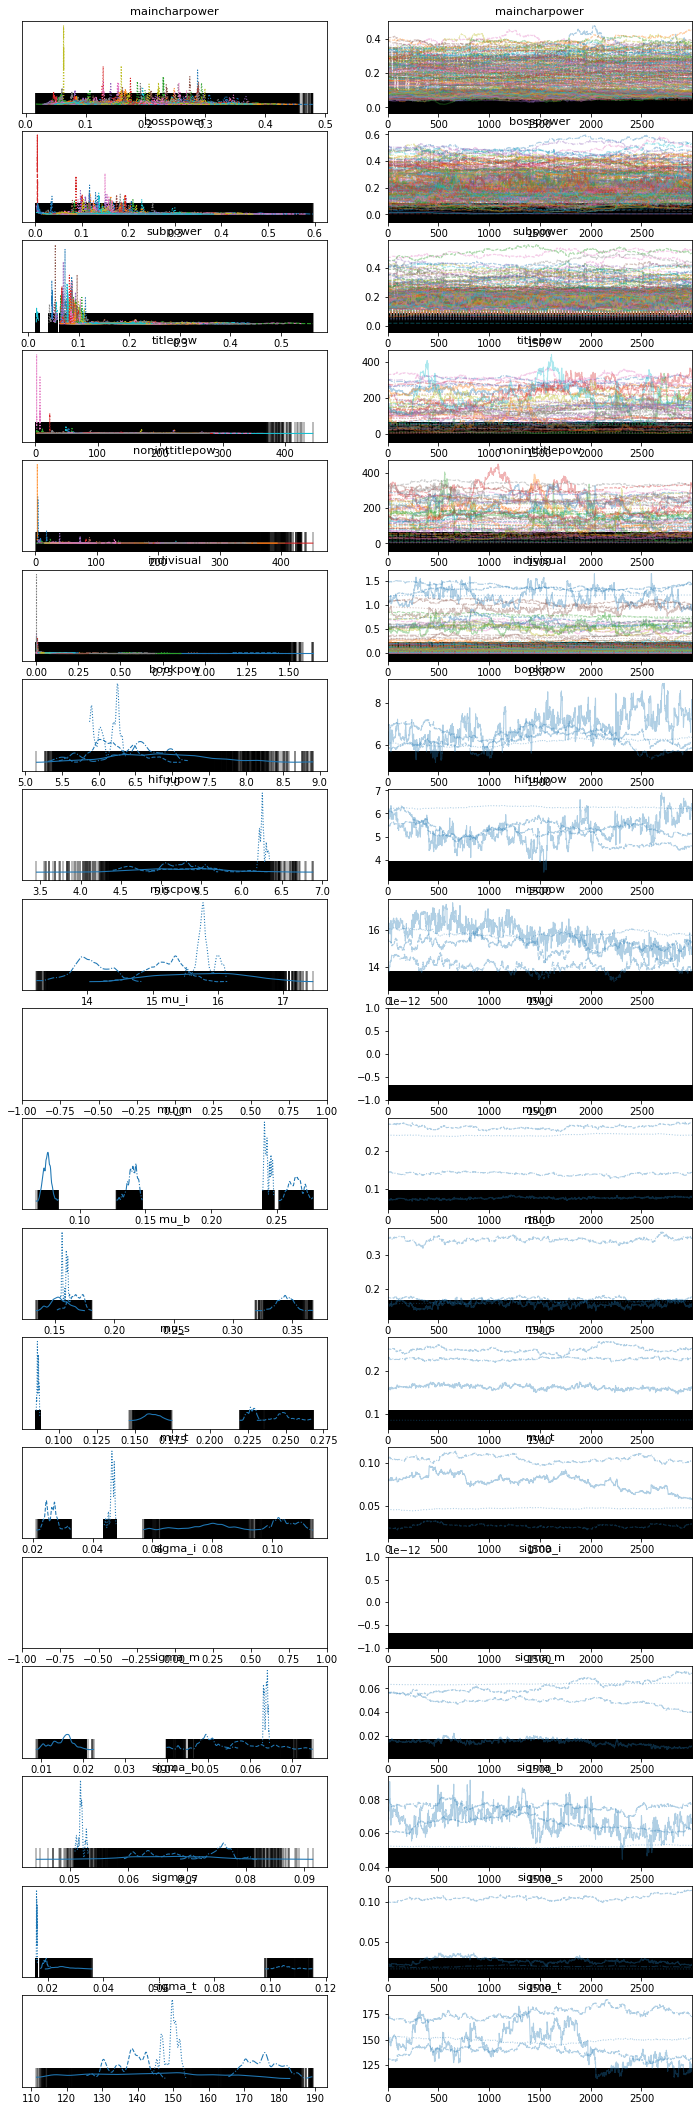

In [5]:
az.plot_trace(fit_prodsuminline)

In [12]:
!ls -rtl fit*

-rw-rw-r-- 1 xiangze xiangze 1622320465  3月 14 13:40 fit_reducetime.pkl
-rw-rw-r-- 1 xiangze xiangze 1922628277  3月 16 18:44 fit_withtitlewithtitle.pkl
-rw-rw-r-- 1 xiangze xiangze 2078014695  3月 19 13:58 fit_hyper_old.pkl
-rw-rw-r-- 1 xiangze xiangze 2216579157  3月 22 23:26 fit_withtitlesubtitle.pkl
-rw-rw-r-- 1 xiangze xiangze          4  3月 24 00:11 fit_prodsum.pkl
-rw-rw-r-- 1 xiangze xiangze  557667568  3月 24 00:20 fit_indivisual.pkl
-rw-rw-r-- 1 xiangze xiangze          4  3月 24 00:54 fit_sum.pkl
-rw-rw-r-- 1 xiangze xiangze  304077459  3月 24 13:41 fit_suminline.pkl
-rw-rw-r-- 1 xiangze xiangze 1114489970  3月 24 19:30 fit_prodsuminline.pkl
-rw-rw-r-- 1 xiangze xiangze  740919060  3月 25 19:41 fit_sumindivisualinline.pkl
-rw-rw-r-- 1 xiangze xiangze 1638395859  3月 26 09:45 fit_prodsumT.pkl


In [13]:
!cat postdata/summary_prodsumT.csv


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
"maincharpower[0, 0]",2.87,0.626,1.87,3.661,0.306,0.233,4.0,11.0,3.23
"maincharpower[0, 1]",2.763,0.603,1.619,3.594,0.294,0.227,4.0,11.0,3.69
"maincharpower[0, 2]",2.156,0.741,0.891,2.885,0.369,0.282,4.0,11.0,3.54
"maincharpower[0, 3]",3.371,0.627,2.379,4.232,0.311,0.238,4.0,14.0,3.33
"maincharpower[0, 4]",3.157,0.595,2.252,4.058,0.293,0.224,4.0,11.0,3.37
"maincharpower[0, 5]",2.891,0.562,2.316,3.954,0.276,0.211,4.0,11.0,3.23
"maincharpower[0, 6]",3.474,0.87,2.34,4.468,0.433,0.331,5.0,26.0,2.46
"maincharpower[0, 7]",1.871,0.693,1.084,2.757,0.344,0.264,4.0,13.0,4.15
"maincharpower[0, 8]",2.222,1.107,0.781,3.968,0.552,0.423,4.0,14.0,3.33
"maincharpower[0, 9]",2.461,0.92,1.258,3.813,0.458,0.351,4.0,12.0,3.51
"maincharpower[0, 10]",2.227,0.381,1.566,2.639,0.188,0.144,5.0,15.0,2.64
"maincharpower[0, 11]",2.6,0.538,1.74,3.229,0.266,0.204,5.0,15.0,3.02
"maincharpower[0, 12]",2.961,0.69,2.153,3.83,0.342,0.262,5.0,11.0,2.93
"main